# **Delhi House Price Analysis**


## **By Abhishek Thankur**



# **Table of Contents**

[**Problem Statement**](#Section2)<br>
[**Importing Packages**](#Section2)<br>
[**Loading Data**](#Section2)<br>
[**Description of the Dataset**](#Section2)<br>
[**Data Preprocessing**](#Section2)<br>
[**Exploratory Data Analysis**](#Section2)<br>
[**Conclusion**](#Section2)<br>


# 1 Problem Statement

1)NewBricks Pvt Ltd is a website that provides a common platform for property buyers & sellers to locate properties of interest in India, and source information about all property related issues.

2)Apart from buying, selling & renting properties in India, users have access to guides that cover all the essential steps and stages entailed in property buying.

3)They also provide a tool which empowers property seekers and investors with detailed information on the movement of residential apartment prices and supply of properties.

4)Recently, they have been seeing a surge in number of listings on their website.

5)They want to leverage this opportunity and determine the relation of prices of listed housing properties with various factors.

6)They have hired you - a data analyst to perform the analysis on houses that have been listed in and near Delhi.

7)Your job is to determine which factors result in price fluctuations of houses in Delhi.



# 2 Importing Libraries

In [265]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

# 3 Loading Data

In [113]:
data = pd.read_csv('C:/Users/Abhishek/Downloads/data.CSV')    



# 4. Data Description

In [114]:
data.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.00000,1259.00000,1257.00000,1226.00000,1259.00000,1018.00000
mean,1466.45272,2.79666,2.55609,1.93556,21306703.73312,15690.13654
std,1568.05504,0.95442,1.04222,6.27921,25601154.52578,21134.73857
min,28.00000,1.00000,1.00000,1.00000,1000000.00000,1259.00000
25%,800.00000,2.00000,2.00000,1.00000,5700000.00000,6364.00000
50%,1200.00000,3.00000,2.00000,1.00000,14200000.00000,11291.50000
75%,1700.00000,3.00000,3.00000,2.00000,25500000.00000,18000.00000
max,24300.00000,10.00000,7.00000,114.00000,240000000.00000,183333.00000


# Observations:

Area ranges from 28.0 to 24300.0, averaging at 1447.54.

BHK ranges from 1 to 10, averaging at 2.79.

Bathroom ranges from 1.0 to 7.0, averaging at 2.55.

Price ranges from 1000000 to 240000000, averaging at 21091726.19.

Per_Sqft ranges from 1259.0 to 183333.0, averaging at 15817.31.

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


# Observations:

We have 2 int64 data type features, 4 float64 data type features and 5 object data type features in the independent features.

We can see a gist of missing values in the dataset. Let's see what the profiling report says:

# 5 Data Preprocessing

In [118]:
data.duplicated().sum()

83

In [119]:
data.duplicated().value_counts()

False    1176
True       83
dtype: int64

In [120]:
null_frame = pd.DataFrame(index=data.columns.values)

In [121]:
null_frame['Null Frequency']=data.isnull().sum().values

In [122]:
percent=data.isnull().sum().values/data.shape[0]

In [123]:
percent

array([0.        , 0.        , 0.00158856, 0.00397141, 0.        ,
       0.02621128, 0.        , 0.        , 0.        , 0.00397141,
       0.19142176])

In [124]:
null_frame["Missing%"]=np.round(percent,decimals=4)*100

In [125]:
null_frame.transpose()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
Null Frequency,0.00000,0.00000,2.00000,5.00000,0.00000,33.00000,0.00000,0.00000,0.00000,5.00000,241.00000
Missing%,0.00000,0.00000,0.16000,0.40000,0.00000,2.62000,0.00000,0.00000,0.00000,0.40000,19.14000


In [263]:
data[data.duplicated()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft


In [264]:
data.isna()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [128]:
data[data.isna()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
data.isna().mode()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,False,False,False,False,False,False,False,False,False,False,False


In [130]:
data["Bathroom"].mode()

0   2.00000
Name: Bathroom, dtype: float64

In [131]:

data.isna().sum()


Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

Observations:

We will first remove the redundant rows from the dataset.

We have missing values in 5 features.

We will also fill the missing values in Furnishing and Type with mode, Bathroom, Parking and Per_Sqft with the mean of the features.

In [132]:
data=data.drop_duplicates()

In [133]:
data.duplicated().sum()

0

In [134]:
data['Bathroom'].fillna(data['Bathroom'].mean(), inplace=True)
data['Parking'].fillna(data['Parking'].median(), inplace=True)
data['Per_Sqft'].fillna(data['Per_Sqft'].mean(), inplace=True)
data['Furnishing'].fillna(data['Furnishing'].mode()[0], inplace=True)
data['Type'].fillna(data['Type'].mode()[0], inplace=True)

In [137]:
data.isna().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [136]:
null_frame = pd.DataFrame(index=data.columns.values)
null_frame['Null Frequency']=data.isnull().sum().values
percent=data.isnull().sum().values/data.shape[0]
null_frame["Missing%"]=np.round(percent,decimals=4)*100
null_frame.transpose()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
Null Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Missing%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


We have succesfully imputed null values and removed the duplicated rows


# 6 Exploratory Data Analysis


Question: Question: What is the distribution of the Area feature?

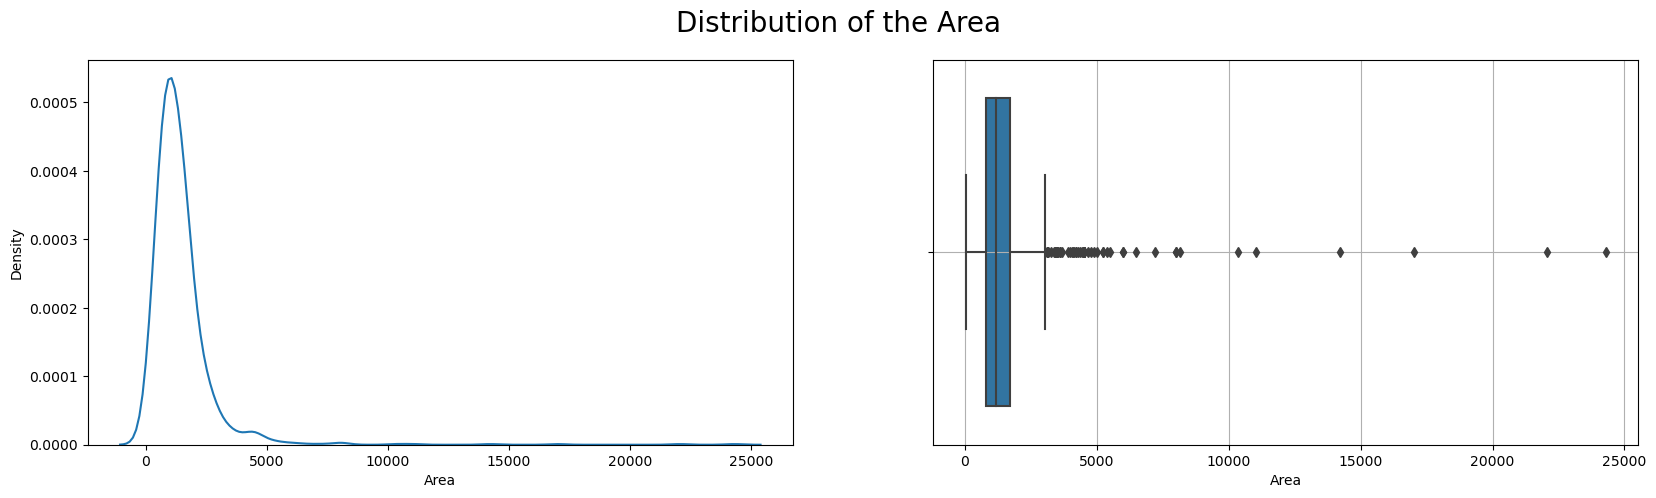

In [273]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.kdeplot(data=data, x="Area", ax=ax[0])
sns.boxplot(x=data["Area"],ax=ax[1]) 
plt.suptitle(t='Distribution of the Area',size=20)
plt.grid(b=True)
plt.show()

Observations:

We can see significant outliers after 2500 sq.ft. of area and a lot of extremeties after 5000 sq.ft. of area.

# Question: What is the distribution of the Per_Sqft feature?

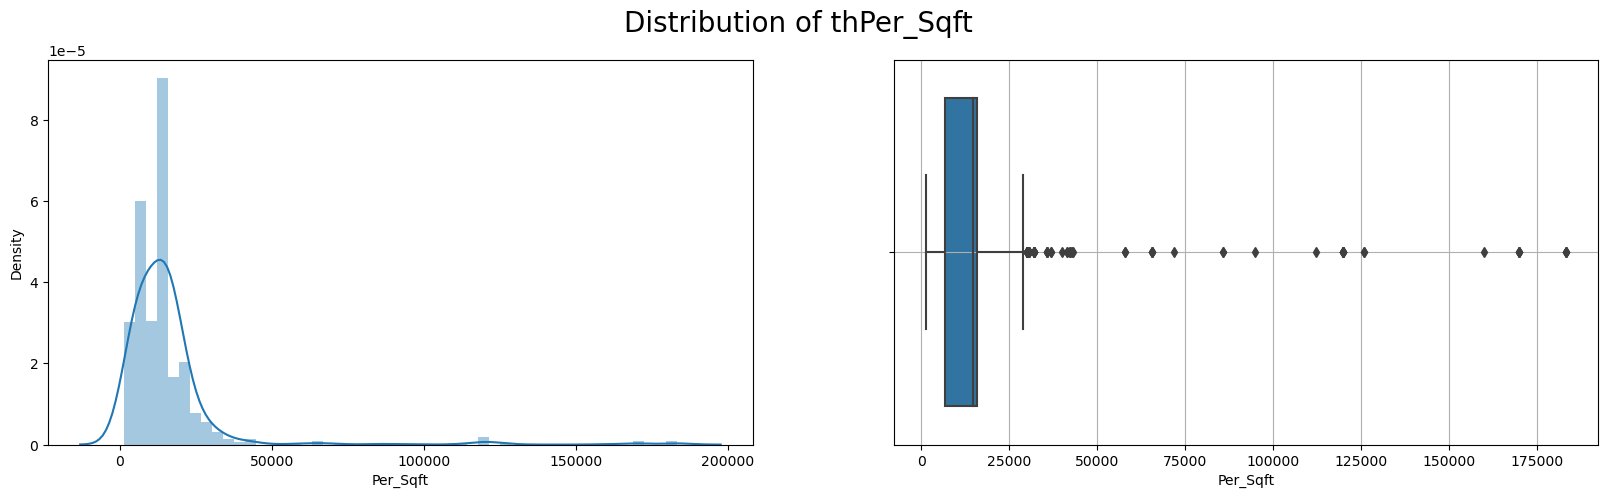

In [288]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.distplot(data["Per_Sqft"],ax=ax[0])
sns.boxplot(x=data["Per_Sqft"],ax=ax[1])
plt.suptitle(t="Distribution of thPer_Sqft",size=20)
plt.grid(b=True)
plt.show()



Observations:

Price per sq.ft. increases significantly after ₹30000 per sq.ft. area maxes out at ₹183333 per sq.ft.

# Question: What is the distribution of the Price feature?

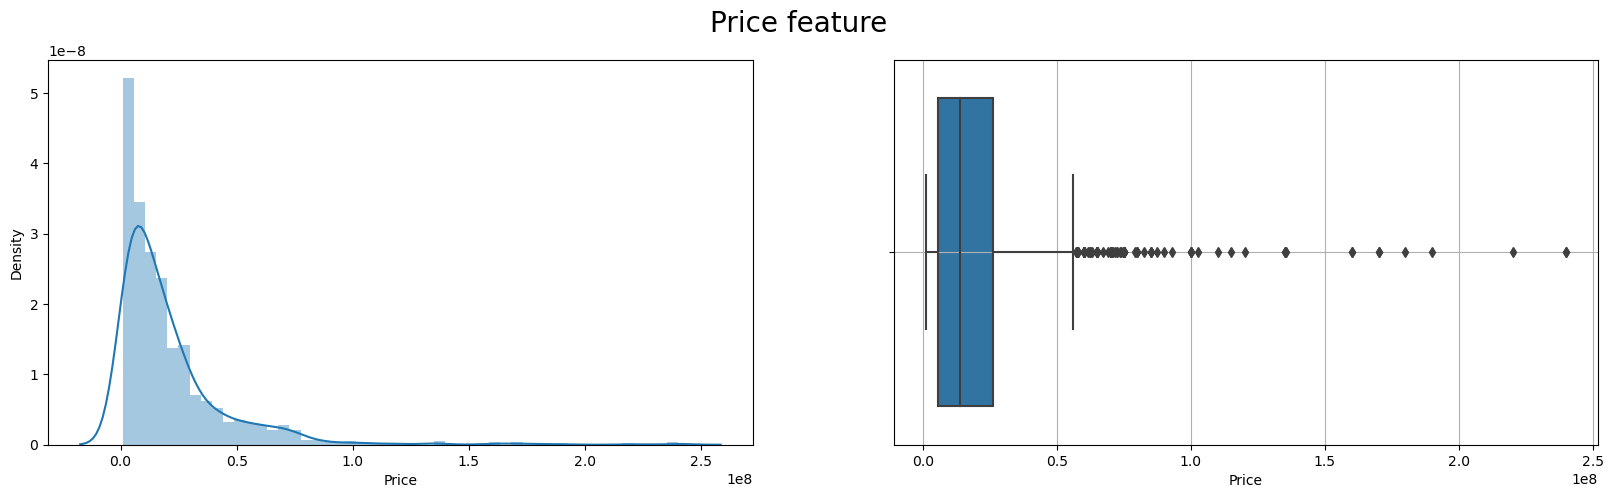

In [278]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.distplot(data['Price'],ax=ax[0])
sns.boxplot(x=data['Price'],ax=ax[1])
plt.suptitle(t='Price feature',size=20)
plt.grid(b=True)
plt.show()

Observations:

Most of the houses are under ₹ 50 lacs, but we can see a lot housing prices go up to ₹25,00,00,000.

# Question: What are the various counts of parking spaces available?

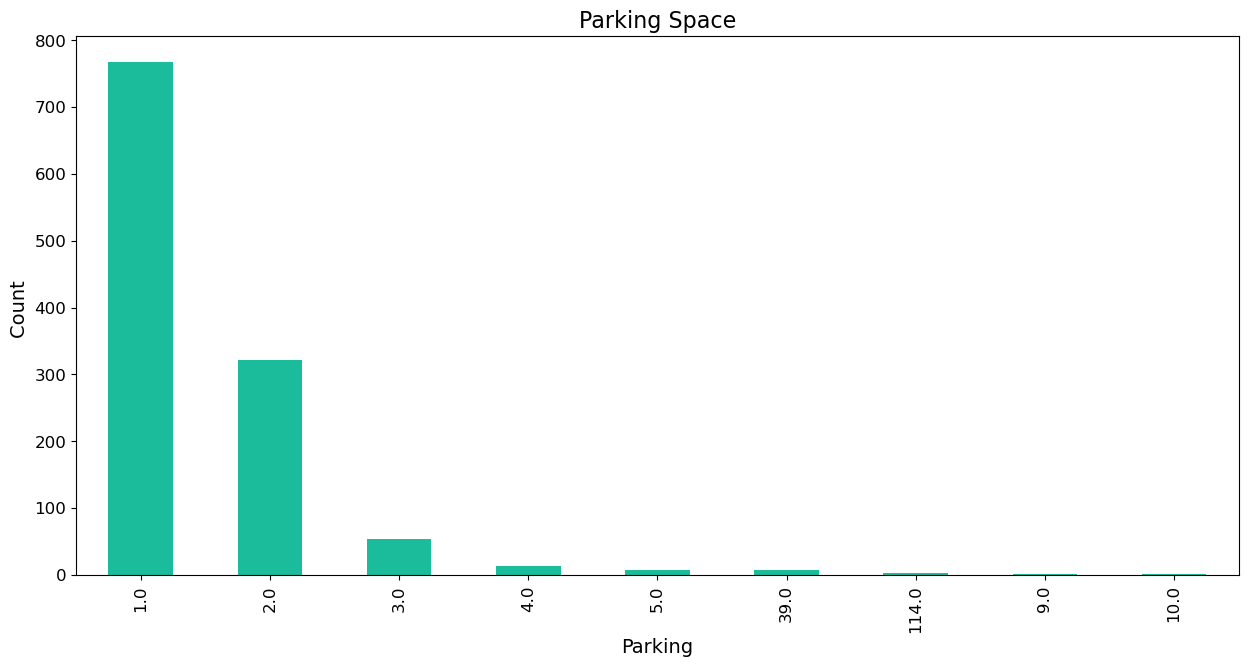

In [279]:
figure = plt.figure(figsize=[15, 7])
data["Parking"].value_counts().plot.bar(color='#1ABC9C',)
plt.xticks(size=12, rotation=90)
plt.yticks(ticks=np.arange(0, 900, 100), size=12)
plt.xlabel(xlabel='Parking', size=14)
plt.ylabel(ylabel='Count ', size=14,rotation=90)
plt.title(label='Parking Space', size=16)
plt.show()

Observations:

Almost 50% of the houses listed have one parking spot, followed by two and three.

We can see unusual spots indicating 39 and 114 parking spots.

#Question: What is the price distribution with respect to Type of house?

In [162]:
data["Type"].value_counts()

Builder_Floor    648
Apartment        528
Name: Type, dtype: int64

In [165]:
A=data[data["Type"]=="Builder_Floor"]

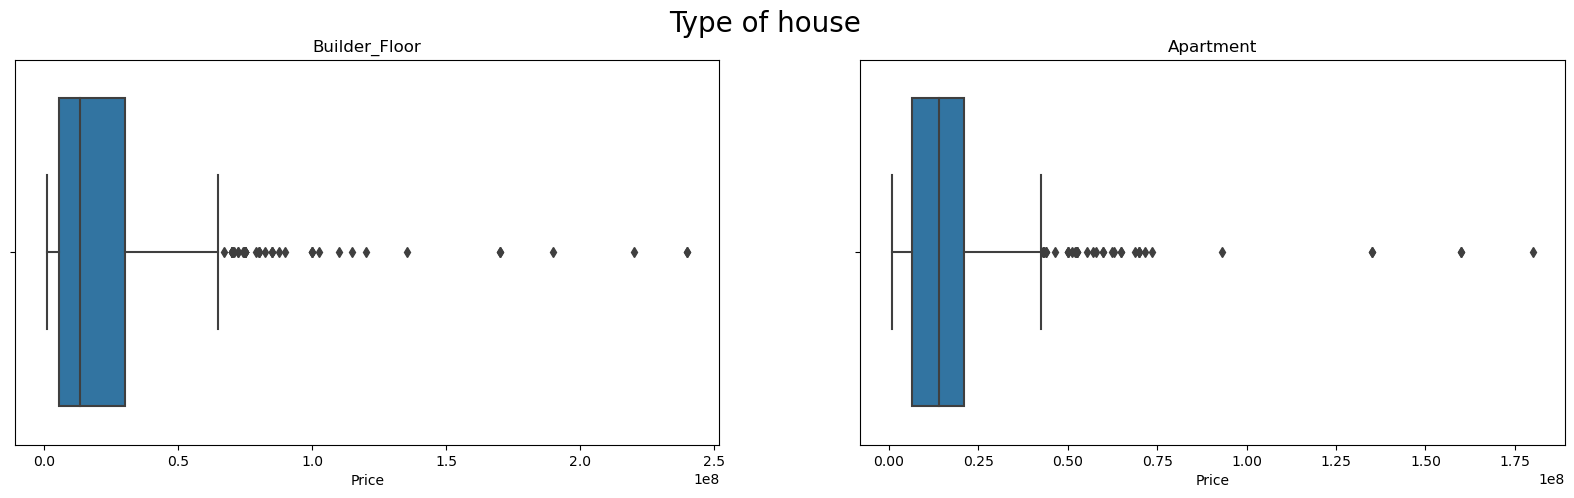

In [318]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.boxplot(x=A["Price"],ax=ax[0])
sns.boxplot(x=data[data["Type"]=="Apartment"]["Price"],ax=ax[1])
plt.suptitle(t='Type of house',size=20)
ax[0].title.set_text('Builder_Floor')
ax[1].title.set_text('Apartment')
plt.show()

Observations:

Apartment listings appear to be cheaper than building floor listings.

Most of the Apartment listings are under र50000000/- whereas most of the building_floor listings are above र50000000/-

Question: What is the price distribution with respect to Status of the house?

In [196]:
data["Status"].value_counts()

Ready_to_move    1115
Almost_ready       61
Name: Status, dtype: int64

<AxesSubplot:>

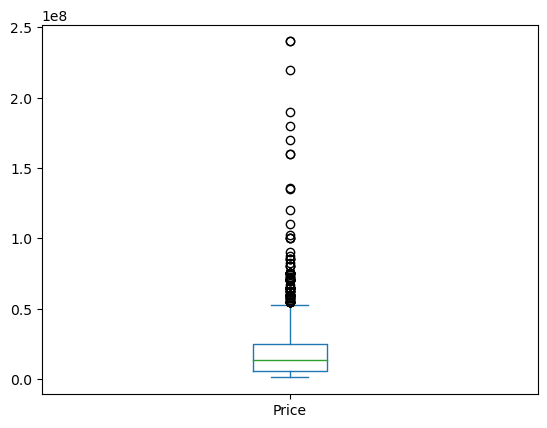

In [201]:
data[data["Status"]=="Ready_to_move"]["Price"].plot.box()

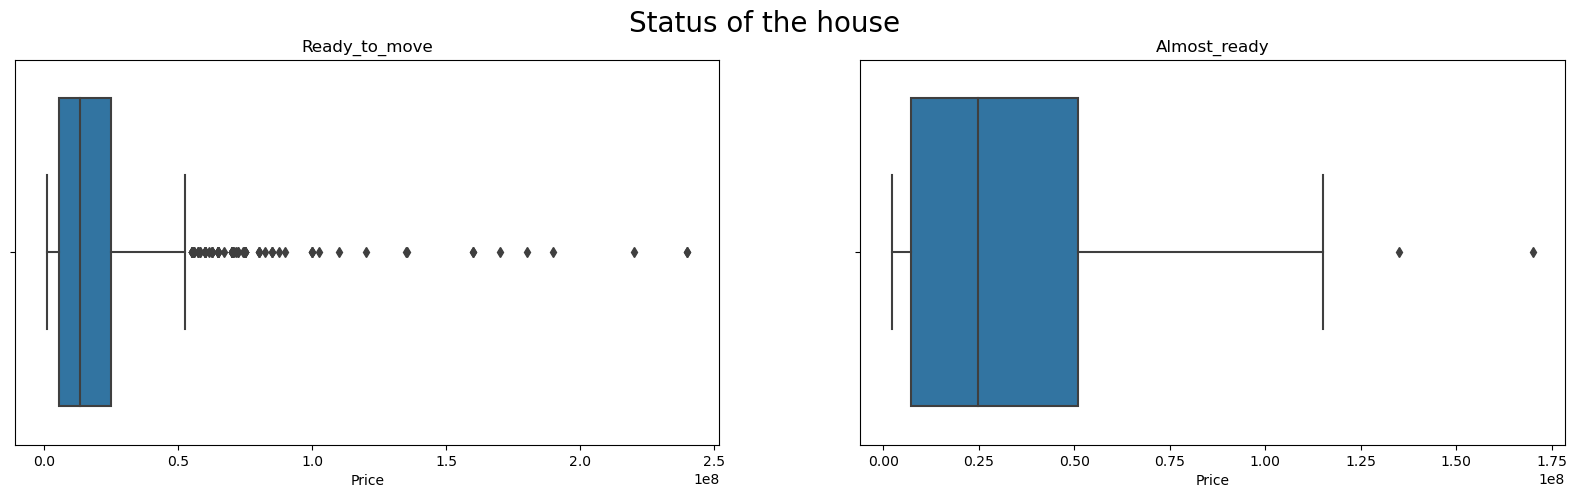

In [320]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.boxplot(x=data[data["Status"]=="Ready_to_move"]["Price"],ax=ax[0])
sns.boxplot(x=data[data["Status"]=="Almost_ready"]["Price"],ax=ax[1])

plt.suptitle(t='Status of the house',size=20)
ax[0].title.set_text('Ready_to_move')
ax[1].title.set_text('Almost_ready')
plt.show()

Observations:

House listings that are already empty (ready to move) are more expensive as compared to Almost ready homes


Question: What is the price distribution with respect to type of Furnishing?


In [206]:
data["Furnishing"].value_counts()

Semi-Furnished    672
Unfurnished       330
Furnished         174
Name: Furnishing, dtype: int64

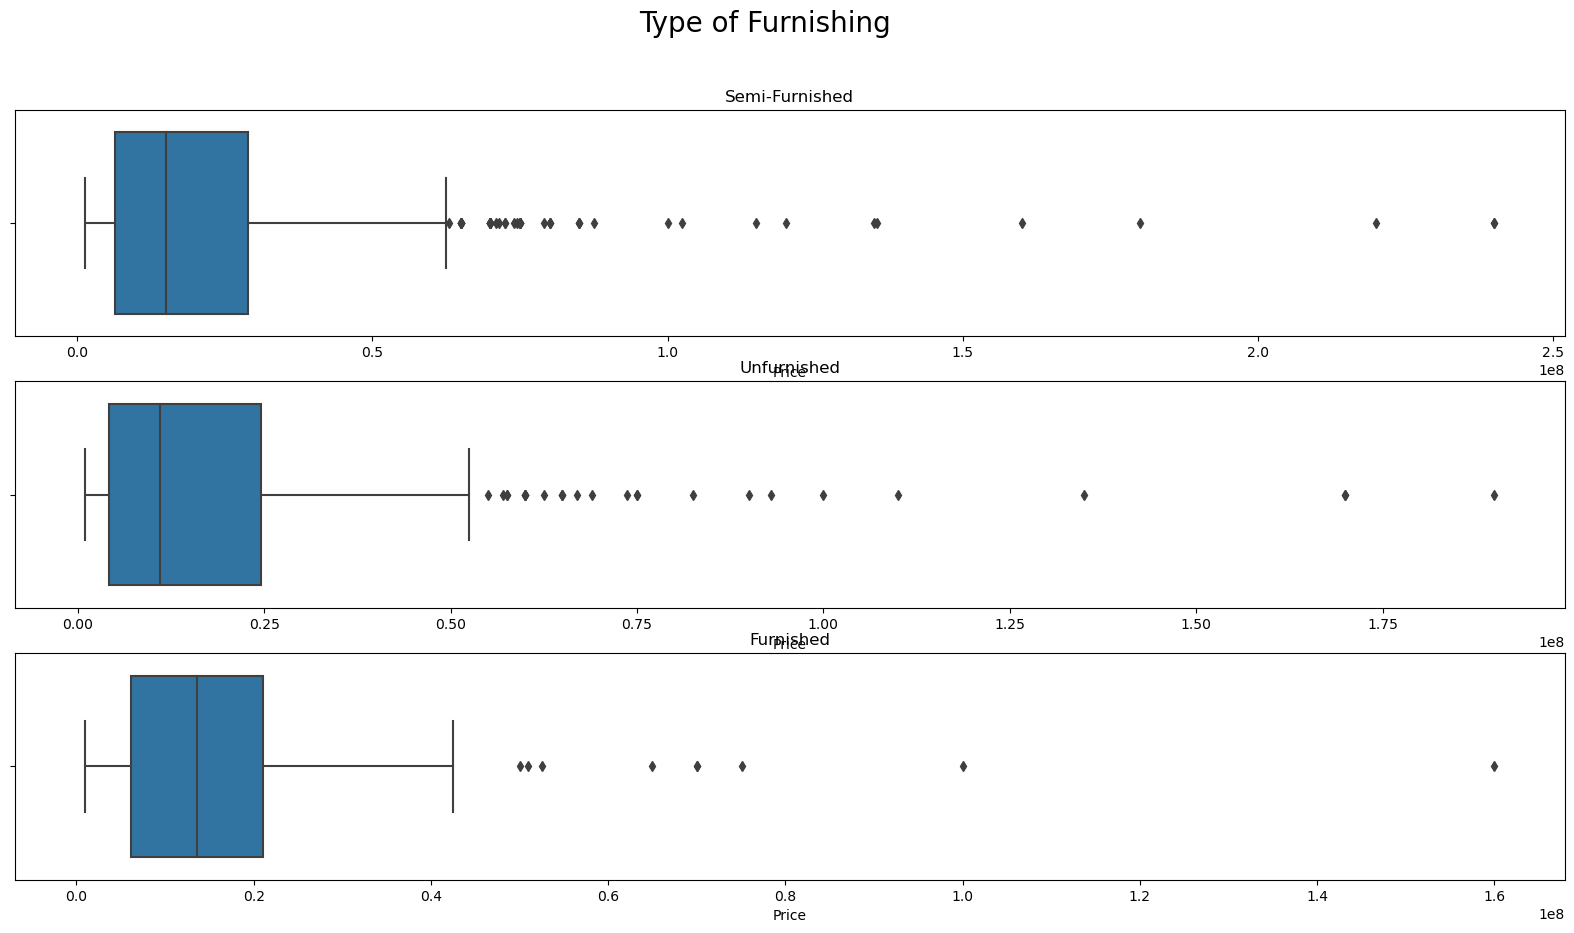

In [323]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))
sns.boxplot(x=data[data["Furnishing"]=="Semi-Furnished"]["Price"],ax=ax[0])
sns.boxplot(x=data[data["Furnishing"]=="Unfurnished"]["Price"],ax=ax[1])
sns.boxplot(x=data[data["Furnishing"]=="Furnished"]["Price"],ax=ax[2])
plt.suptitle(t="Type of Furnishing",size=20)
ax[0].title.set_text('Semi-Furnished')
ax[1].title.set_text('Unfurnished')
ax[2].title.set_text('Furnished')

plt.show()

Observations:

Availability of semi-furnished homes raises the prices up significantly as compared to furnished and unfurnished options.

Already furnished options cause the price to go cheaper than unfurnished homes.

Question: What is the price distribution with respect to house's transaction type?

In [216]:
data["Transaction"].value_counts()

Resale          741
New_Property    435
Name: Transaction, dtype: int64

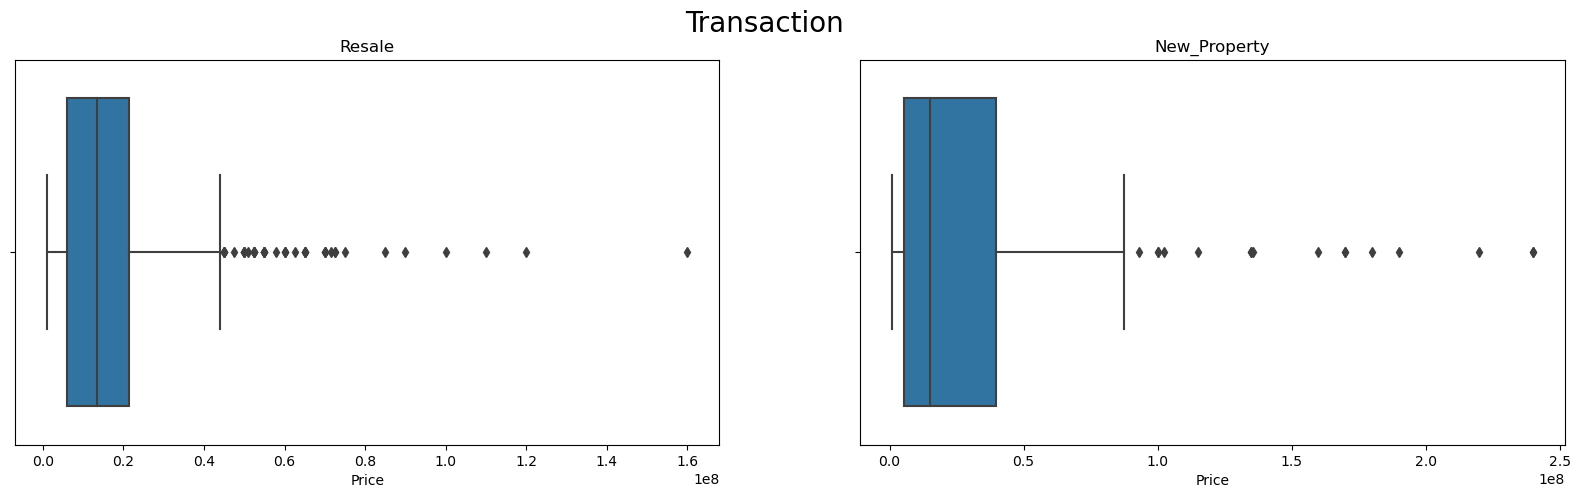

In [325]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.boxplot(x=data[data["Transaction"]=="Resale"]["Price"],ax=ax[0])
sns.boxplot(x=data[data["Transaction"]=="New_Property"]["Price"],ax=ax[1])
plt.suptitle(t="Transaction",size =20)
ax[0].title.set_text('Resale')
ax[1].title.set_text('New_Property')
plt.show()

Observations:

New properties are priced higher than the Resale ones, most of the resale prices being less than र60000000/-

New listings can go as high as र240000000 /-

#What is the price distribution with respect to Type of the house and transaction type?

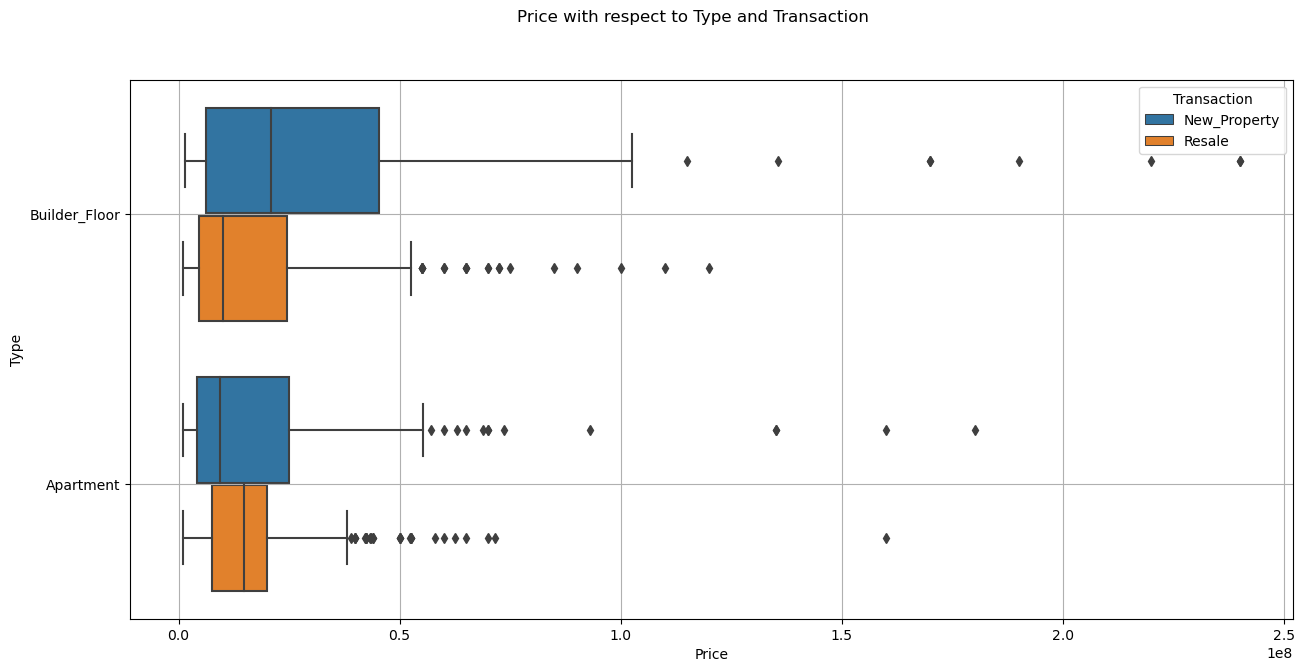

In [244]:
fig = plt.figure(figsize=(15, 7))
sns.boxplot(x=data['Price'], y=data['Type'], hue=data['Transaction'])
plt.suptitle(t='Price with respect to Type and Transaction')
plt.grid(b=True)
plt.show()

Observations:

The most expensive listing is a building floor.

Building floors are quite expensive that their resale prices rival the prices of new apratment listings.

#Question: What is the relation between price of the house and area of the house?

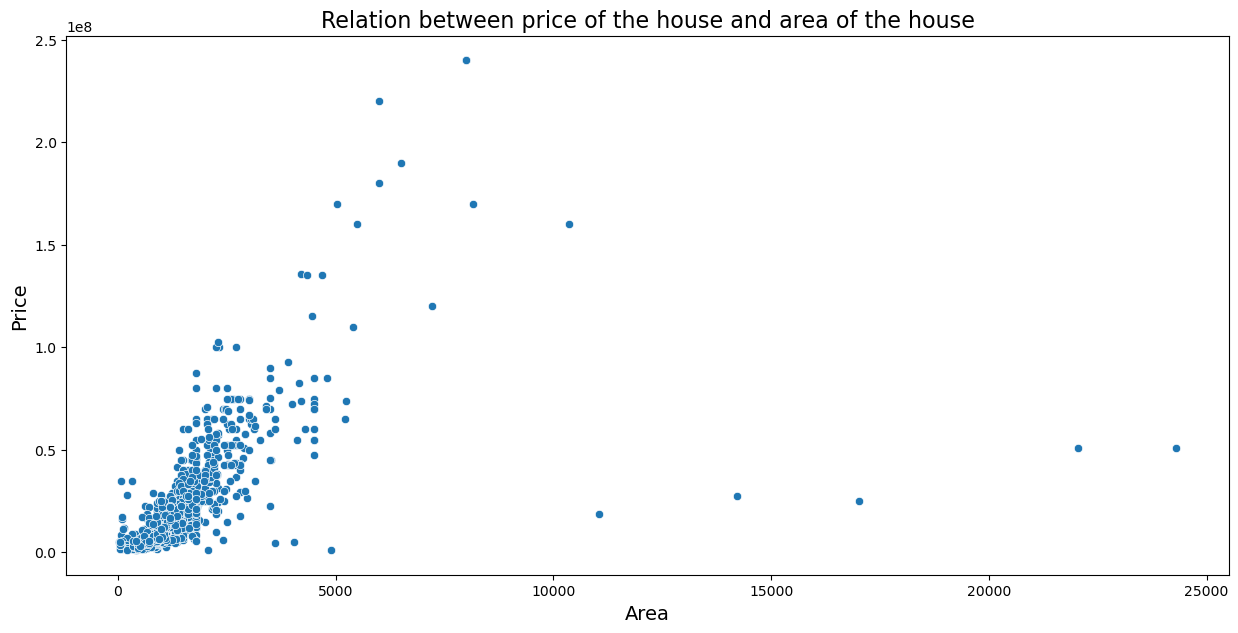

In [252]:

figure = plt.figure(figsize=[15, 7])

sns.scatterplot(x='Area', y='Price', data=data)

plt.xlabel(xlabel='Area', size=14)

plt.ylabel(ylabel='Price', size=14)

plt.title(label='Relation between price of the house and area of the house', size=16)

plt.show()

Observations:

We can observe a slight positive relation that whenever Price Per_Sqft of listed houses increase, the price of the house increases as well.

#Question: What is the relation between price of the house and price per sq.ft. of the house?

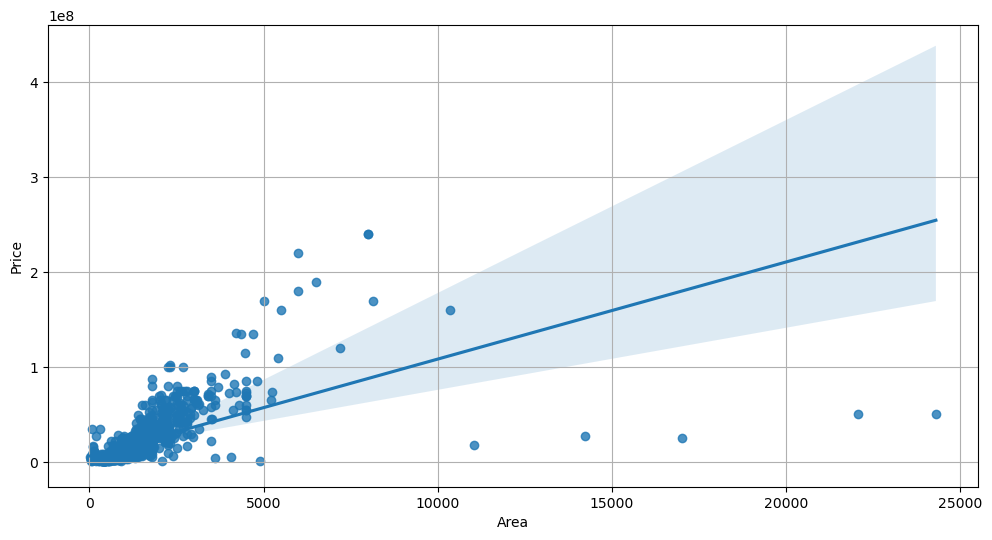

In [327]:

  plt.figure(figsize=(12,6))
  sns.regplot(data['Area'], data['Price'])
  plt.grid(b=True)
    
  plt.show()

Observations:

We can observe a positive relation that whenever area of listed houses increase, the price of the house increases as well.

This is true till area is 10000 sq.ft.

There are instances where prices of houses are stagnant even though the area increases.

#Question: What is the correlation between various features of the dataset?

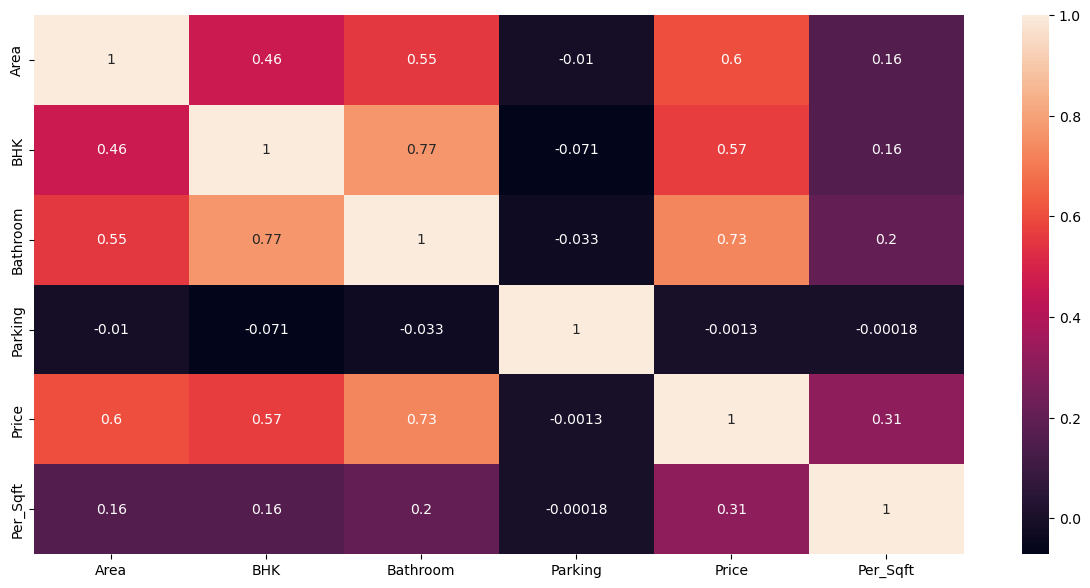

In [255]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True)
plt.show()

Observations:

We can observe high correlation of Price with Area, BHK, Per_Sqft.

Price has highest positive correlation with Bathroom and least with Parking.

Area is highly correlated with all the features except for Parking.

Parking in general, has no correlation with any of the features in the dataset.

# 7. Conclusion

7.1 Summarization

Lajpat Nagar, Kailash Colony, Shahdara, Garima, Chittaranjan Park and Rohini Sector are some of the common localities listed in the dataset.

Semi-furnished homes are relatively more expensive and fully furnished homes are more cheaper.

Price is highly related to Bathroom, Area, BHK and, Per_Sqft.

Most of the Apartment listings are under र50000000/- whereas most of the building_floor listings are above र50000000/-

Building floors are quite expensive that their resale prices rival the prices of new apratment listings.

Almost 50% of the houses listed have one parking spot, followed by two and three.

House listings that are already empty (ready to move) are more expensive as compared to Almost ready homes.

We can observe extreme values of Area and Price in the dataset and sometimes prices being stagnant for relatively big homes.

7.2 Actionable Insights

We need a more clean dataset, specially the one which has precise and accurate information.

We also need data from secondary sources that describe more about the locality, the age of house being listed, the neighborhood area.

Knowing about the type of neighborhood like residential or industrial will also be helpful to determine if it affects the price of houses.

Price is highly related to Bathroom, Area, BHK and, Per_Sqft.

But we can also observe that building floors are more expensive than apartments.

We can use this lot of information to predict the prices of houses, although locality is an important factor and we need more information on that.

The company can use this information and extrapolate some of the observations throughout the country's listings.